In [1]:
import pandas as pd
from functools import reduce
import numpy as np
import gc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_feather("../data/finaldata/fact_data.feather")

In [3]:
tmp_data = data._get_numeric_data()
tmp_data = tmp_data.fillna(0)
tmp_data.head()

,product_volume,number_of_blood_product_units_processed,number_of_donation_units_processed,number_of_duplicated_donation_units,number_of_skipped_donation_barcodes,number_of_donation_alarms,number_of_alerts,number_of_duplicated_exception_units,number_of_reprocessed_units,number_of_inconclusive_sealed_units,number_of_unrecognized_barcodes,number_of_skipped_exception_barcodes,number_of_temp_out_of_range_exceptions,number_of_exception_alarms,procedure_duration_minutes,idle_time_duration_minutes,load_duration_minutes,unload_duration_minutes,load_idle_time_duration_minutes,run_duration_minutes,barcode_scan_duration_minutes,number_of_procedures,number_of_dummy_bags,number_of_barcode_scans,number_of_skipped_run_barcodes,start_basin_temperature,end_basin_temperature,max_basin_temperature,min_basin_temperature,run_number
0,94,1,1,1,0,0,0,0,0,0,0,0,0,0,56.837234,0.0,32.056816,0.416667,0.671117,21.049999,6.171717,1,0,9,0,19.975,20.605,22.698999,19.961,1577.0
1,64,1,1,1,0,0,0,0,0,0,0,0,0,0,56.837234,0.0,32.056816,0.416667,0.671117,21.049999,6.171717,1,0,9,0,19.975,20.605,22.698999,19.961,1577.0
2,9,1,1,1,0,0,0,0,0,0,0,0,0,0,56.837234,0.0,32.056816,0.416667,0.671117,21.049999,6.171717,1,0,9,0,19.975,20.605,22.698999,19.961,1577.0
3,180,1,1,1,0,0,0,0,0,0,0,0,0,0,56.837234,0.0,32.056816,0.416667,0.671117,21.049999,6.171717,1,0,9,0,19.975,20.605,22.698999,19.961,1577.0
4,68,1,1,1,0,0,0,0,0,0,0,0,0,0,56.837234,0.0,32.056816,0.416667,0.671117,21.049999,6.171717,1,0,9,0,19.975,20.605,22.698999,19.961,1577.0


In [36]:
tmp_data['end_basin_temperature'].describe()

count    2.192149e+07
mean     2.131516e+01
std      2.265117e+00
min      0.000000e+00
25%      2.107900e+01
50%      2.170100e+01
75%      2.201600e+01
max      5.500000e+01
Name: end_basin_temperature, dtype: float64

In [37]:
tmp_data['start_basin_temperature'].describe()

count    2.192149e+07
mean     2.093417e+01
std      2.332670e+00
min      0.000000e+00
25%      2.035200e+01
50%      2.139700e+01
75%      2.196000e+01
max      5.500000e+01
Name: start_basin_temperature, dtype: float64

In [38]:
tmp_data['max_basin_temperature'].describe()

count    2.192149e+07
mean     2.257268e+01
std      2.317299e+00
min      0.000000e+00
25%      2.258400e+01
50%      2.276400e+01
75%      2.295400e+01
max      5.500000e+01
Name: max_basin_temperature, dtype: float64

## K Means with number of alerts and max temperature

In [19]:
simpleData = tmp_data.filter(['number_of_alerts', 'max_basin_temperature'])

In [7]:
train_data, test_data = train_test_split(simpleData, test_size=0.5)

In [8]:
train_data.head(10)

,number_of_alerts,max_basin_temperature
18304952,1,22.660000
21035398,0,22.863001
1847118,0,22.959999
18971586,1,22.295000
9983346,1,22.830999
13744639,0,23.087000
2471237,0,22.480000
17616679,0,22.454000
20428212,0,22.466999
14346729,0,22.576000


In [14]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(train_data)

In [15]:
labels = kmeans.labels_

In [16]:
kmeans.fit(train_data['max_basin_temperature'].values.reshape(-1, 1).astype('float'))
y_kmeans = kmeans.predict(train_data['max_basin_temperature'].values.reshape(-1, 1).astype('float'))

[[2.30455943e+01]
 [4.08355867e-04]
 [2.26090165e+01]
 [2.40689469e+01]
 [2.08179254e+01]]


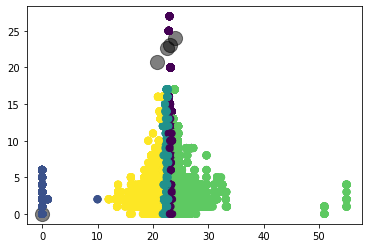

In [17]:
centers = kmeans.cluster_centers_
print(centers)
plt.scatter(centers, centers, c='black', s=200, alpha=0.5)
plt.scatter(train_data['max_basin_temperature'], train_data['number_of_alerts'], c=y_kmeans, s=50, cmap='viridis')



## K Means with number of alerts and run duration

In [32]:
simpleData2 = tmp_data.filter(['number_of_alerts', 'run_duration_minutes'])

In [33]:
train_data2, test_data2 = train_test_split(simpleData2, test_size=0.5)

In [34]:
train_data2.head(10)

,number_of_alerts,run_duration_minutes
8213297,0,19.315016
11327160,0,13.500000
8320730,0,21.799999
398585,3,10.916667
16759355,0,22.083334
14172468,0,18.400000
13036911,4,19.883333
13777926,0,11.700000
9857964,0,22.333334
15593147,1,20.116667


In [35]:
kmeans2 = KMeans(n_clusters=4, random_state=0).fit(train_data2)

In [39]:
labels2 = kmeans2.labels_

In [41]:
kmeans2.fit(train_data2['run_duration_minutes'].values.reshape(-1, 1).astype('float'))
y_kmeans2 = kmeans2.predict(train_data2['run_duration_minutes'].values.reshape(-1, 1).astype('float'))

[[  19.57041907]
 [3259.36248537]
 [1366.14447343]
 [6521.64591319]]


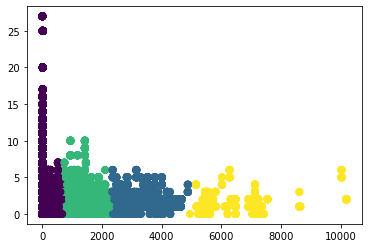

In [42]:
centers2 = kmeans2.cluster_centers_
print(centers2)
#plt.scatter(centers2, centers2, c='black', s=200, alpha=0.5)
plt.scatter(train_data2['run_duration_minutes'], train_data2['number_of_alerts'], c=y_kmeans2, s=50, cmap='viridis')

